# SOLUTION

### Explanation

In this notebook, you will complete two tasks: the first task will be to apply feature engineering to transform and adapt the variables of the dataset, and the second task will be to train a linear regression model to predict the price of insurance policies.

Dataset con be found [here](https://www.kaggle.com/datasets/mirichoi0218/insurance)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.linear_model import LinearRegression

### Load Dataset

In [2]:
df = pd.read_csv("insurance.csv")

### 1. EDA

**1.1 Print the first columns**

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**1.2 Shape**

In [4]:
df.shape

(1338, 7)

**1.3 Check column data type**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**1.3 Check if NaN Values**

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

**1.4 Print unique values for 'sex', 'smoker' and 'region'**

In [7]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [8]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [9]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### 2. Feature Engineering


Task to be done:

- Encode the column 'sex'
- Encode the column 'smoker'
- Get dummies from column 'region'

**2.1 Encode the variables 'sex' and 'smoker' using [LabelEncoder()](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)**

*__HINT__ LabelEncoder works with the same logic as OneHotEncoder (check the slides)*

In [10]:
encoder = LabelEncoder()

df['sex'] = encoder.fit_transform(df['sex'])
df['smoker'] = encoder.fit_transform(df['smoker'])

# Visualize the results

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


**2.2 Encode the varibale 'region' using the function [get_dummies()](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)**

- Create new columns from region values using pd.get_dummies
- Drop the column 'region' from the dataframe
- Append the new columns to the dataframe using pd.concat()

In [11]:
# Creating new columns
columns_region = pd.get_dummies(df['region'])

# Drop column 'region'
df.drop(columns=['region'],axis=1,inplace=True)

# Append the new columns to the dataframe
df = pd.concat([df,columns_region],axis=1)

# Visualize the dataframe
df.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


## Linear Regression

**Determine wich columns are Independent (X) and which is the target(y)**

In [12]:
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'northeast',
       'northwest', 'southeast', 'southwest']]

y = df['charges']

**Using train_test_split function, create 4 variables to train and test the model**

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1000)

**Print the shapes of the sets**

In [14]:
# Shape of X sets
X_train.shape, X_test.shape, 

((1003, 9), (335, 9))

In [15]:
# Shape of y sets
y_train.shape,y_test.shape

((1003,), (335,))

### Train Model

In [16]:
# Creating an instance of the LinearRegression model
lm = LinearRegression()

# Fitting the linear regression model to the training data
lm.fit(X_train, y_train)

LinearRegression()

#### Predictions 

Predict charges using the test dataset

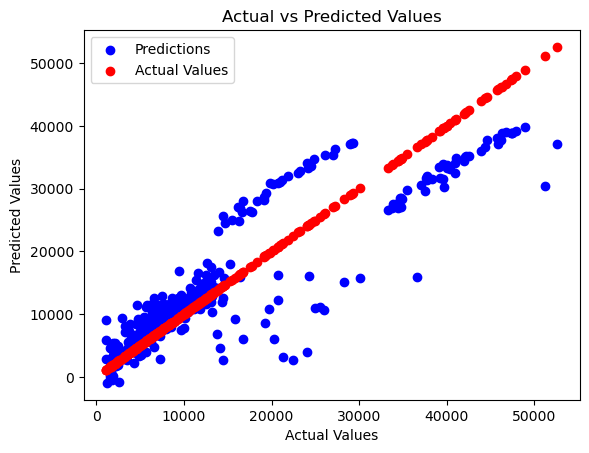

In [17]:
# Predictions
predictions = lm.predict(X_test)

# Scatter plot
plt.scatter(y_test, predictions, c='blue', label='Predictions') 
plt.scatter(y_test, y_test, c='red', label='Actual Values')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()

# Show the plot
plt.show()

**Print the score**

In [18]:
lm.score(X_test,y_test)

0.7932567950179648

In [19]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4125.341820040923
MSE: 33022578.484854195
RMSE: 5746.527515365622


The linear regression model applied to the insurance dataset yielded the following metrics:

- **Mean Absolute Error (MAE): 4125.34**  
  This metric represents the average absolute difference between the actual values (`y_test`) and the predicted values (`predictions`). A MAE of 4125.34 indicates that, on average, the model's predictions are approximately 4125.34 units away from the actual insurance values. The lower the MAE, the closer the predictions are to the actual values, indicating better accuracy.

- **Mean Squared Error (MSE): 33,022,578.48**  
  MSE is similar to MAE but involves squaring the differences before averaging them. The high MSE of 33,022,578.48 suggests that the model’s predictions have significant deviations from the actual values. The squaring aspect of MSE penalizes larger errors more heavily, making it sensitive to outliers.

- **Root Mean Squared Error (RMSE): 5746.53**  
  RMSE is the square root of MSE, bringing it back to the same units as the response variable. An RMSE of 5746.53 implies that the model's predictions, on average, deviate by 5746.53 units from the actual values. Like MSE, a lower RMSE indicates a more accurate model.

- **R-squared (R²): 0.7932**  
  R² is the coefficient of determination, which measures the proportion of variance in the dependent variable that can be predicted from the independent variable(s). An R² value of 0.7932 means that approximately 79.32% of the variance in insurance costs is explained by the model. The closer R² is to 1, the better the model is at explaining the variance in the data.

In summary, these metrics provide insights into the model's performance. The MAE, MSE, and RMSE values show the existence of errors in prediction, which is typical in real-world scenarios. The relatively high R² value indicates that the model is fairly good at explaining the variance in the data. However, the error metrics (MAE, MSE, RMSE) suggest potential areas for improvement in the model, possibly through more advanced feature engineering, utilization of different features, or exploring alternative modeling techniques.